<a href="https://colab.research.google.com/github/rguille3/PhysicsI_Labs/blob/main/Yet_another_copy_of_phy122_N1Lt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phy 122 Lab 1
Raul Guillen
26Oct2024

#   <font color='Red'> **Import Necessary Modules** </font>

In [ ]:
import numpy as np
from numpy.linalg import norm
from numpy import array, sqrt, zeros, arange
import matplotlib.pyplot as plt

π = np.pi

def d(X):
    return np.gradient(X, axis=0)

### <font color='Red'> Before we start lets define the times in which all our experiments will take place. </font>

### <font color='Red'> Define a time-increment (Δt), initial (t0), and a final (tf) time for your experiment. And with it a time_array. </font>

In [ ]:
Δt = 0.01
t0 = 0
tf = 10

dt       = Δt
timeline = arange(t0, tf, Δt)

#   <font color='Red'> **Experiment 1** </font>

### <font color='Red'> To begin lets start with by defining an initial position. </font>

In [ ]:
x_0 = array([1., 0., 0.])

### <font color='Red'> PRINT the distance of the previously defined position vector (give units!): </font>

In [ ]:
distance = norm(x_0)

print("the initial distance is %4.3f meters "  % distance)

the initial distance is 1.000 meters 


### <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t. </font>

In [ ]:
x_t = zeros((len(timeline), 3)) ## initialize position-trajectory (position vectors for all times)
v_t = zeros((len(timeline), 3)) ## initialize velocity-trajectory (velocity vectors for all times)

x_t[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
for t in range(1,len(timeline)):
    x_t[t] = x_t[t-1] + v_t[t-1] * Δt ## numerically integrate the velocity
    v_t[t] = v_t[t-1] ## set new velocity = old velocity (because constant velocity)

### <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

In [ ]:
dxdt_t = d(x_t)/dt ## take numerical-derivative of the aforementioned position-trajectory

### <font color='Red'> Make 2 plots of with: x_t and \{v_t, dxdt_t\} in matplotlib, both as a function of time. Make sure to include all LABELS!. </font>

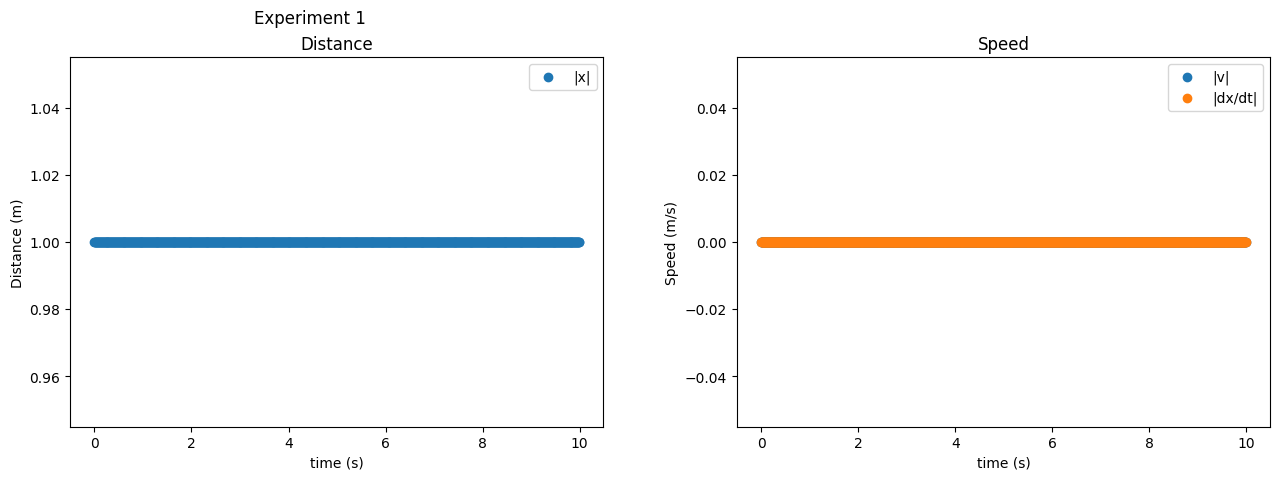

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Experiment 1")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)


ax1.scatter(timeline, norm(x_t, axis=1), label="|x|")
ax1.set_title("Distance")
ax1.legend()
ax1.set(xlabel="time (s)", ylabel="Distance (m)")

ax2.scatter(timeline, norm(v_t, axis=1), label="|v|")
ax2.scatter(timeline, norm(dxdt_t, axis=1), label="|dx/dt|")
ax2.set_title("Speed")
ax2.legend()
ax2.set(xlabel="time (s)", ylabel="Speed (m/s)")
fig.show()


**Caption**

The proceeding graphs plots an object's behavior at rest over time. Our distance-versus-time graph shows the object remaining at a constant distance from the origin, indicating no movement. By calculating the numerical derivative of the position graph and plotting the result, we confirm that the velocity magnitude remains zero. Since speed is defined as the change in distance over time, and there is no position change, the speed over time also remains at zero throughout.

#   <font color='Red'> **Experiment 2** </font>

### <font color='Red'> To begin lets start with by defining an initial position and velocity </font>

In [ ]:
x_0 = array([1., 0., 0.]) ## m : initial position vector/array
v_0 = array([1., 0., 0.]) ## m/s : initial velocity vector/array

### <font color='Red'> PRINT out the distance and speed of the previously defined position and velocity vectors: </font>

In [ ]:
distance = norm(x_0)
speed    = norm(v_0)

print("the initial distance is %4.3f meters "  % distance )
print("the initial speed    is %4.3f meters/second "  % speed )

the initial distance is 1.000 meters 
the initial speed    is 1.000 meters/second 


### <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t. </font>

In [ ]:
x_t = zeros((len(timeline), 3)) ## initialize position-trajectory (position vectors for all times)
v_t = zeros((len(timeline), 3)) ## initialize velocity-trajectory (velocity vectors for all times)

x_t[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
for t in range(1,len(x_t)):
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt ## numerically integrate the velocity
  v_t[t] = v_t[t-1] ## set new velocity = old velocity (because constant velocity)

### <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

### <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>



In [ ]:
dxdt_t = d(x_t)/dt ## take numerical-derivative of the aforementioned position-trajectory
dvdt_t = d(v_t)/dt ## take numerical-derivative of the aforementioned velocity-trajectory

### <font color='Red'> Calculate the Average Velocity over time, v_t. </font>

In [ ]:
np.sum(v_t, axis=0)/(len(v_t))

array([1., 0., 0.])

### <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and dvdt_t in matplotlib, both as a function of time. Make sure to include all LABELS!. </font>

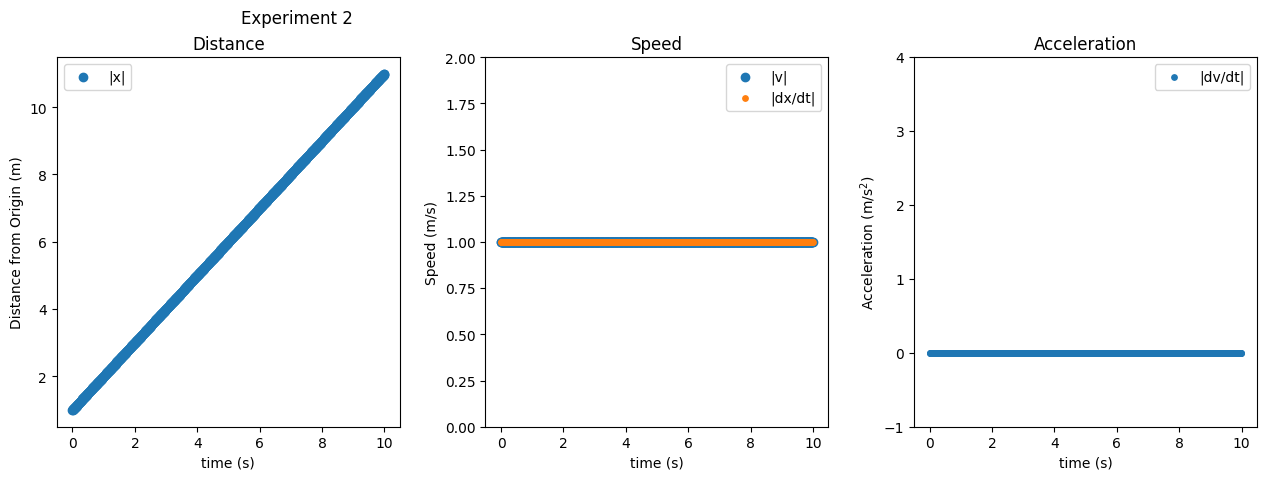

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Experiment 2")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, norm(x_t, axis=1), label="|x|")
ax1.set_title("Distance")
ax1.legend()
ax1.set(xlabel="time (s)", ylabel="Distance from Origin (m)")

ax2.scatter(timeline, norm(v_t   , axis=1), label="|v|")
ax2.scatter(timeline, norm(dxdt_t, axis=1), s=15, label="|dx/dt|")
ax2.set_title("Speed")
ax2.set_ylim([0, 2])
ax2.legend()
ax2.set(xlabel="time (s)", ylabel="Speed (m/s)")

ax3.scatter(timeline, norm(dvdt_t, axis=1), s=15, label="|dv/dt|")
ax3.set_ylim([-1, 4])
ax3.set_title("Acceleration")
ax3.set(xlabel="time (s)", ylabel="Acceleration (m/s$^2$)")
ax3.legend()
fig.show()

**Caption**

In the second experiment, we plot an object moving a constant distance away from the origin over time. Our distance-versus-time graph shows a steady increase in distance, indicating a constant velocity. By calculating the numerical derivative of the position graph and plotting the result, we see that the velocity graph shows a constant value, while the acceleration graph remains at zero. Since velocity represents the rate of change of distance over time, and this change is steady, acceleration remains zero throughout due to no change in velocity over time.

#   <font color='Red'> **Experiment 3** </font>

###  <font color='Red'> To begin lets start with by defining an initial position, velocity, and acceleration </font>

In [ ]:
x_0 = array([1., 0., 0.]) ## m : initial position vector/array
v_0 = array([1., 0., 0.]) ## m/s : initial velocity vector/array
a_0 = array([2., 0., 0.]) ## m/s/s : initial acceleration vector/array

###  <font color='Red'> PRINT out the distance, speed, and magnitude of the acceleration of the previously defined vectors: </font>

In [ ]:
distance     = norm(x_0)
speed        = norm(v_0)
acceleration = norm(a_0)

print("the initial distance     is %4.3f meters "  % distance)
print("the initial speed        is %4.3f meters/second "  % speed)
print("the initial acceleration is %4.3f meters/second/second "  % acceleration)

the initial distance     is 1.000 meters 
the initial speed        is 1.000 meters/second 
the initial acceleration is 2.000 meters/second/second 


###  <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [ ]:
x_t = zeros((len(timeline), 3)) ## initialize position-trajectory (position vectors for all times)
v_t = zeros((len(timeline), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
a_t = zeros((len(timeline), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

x_t[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
a_t[0] = a_0 ## initialize the 0th acceleration-trajectory entry to the initial-acceleration
for t in range(1,len(x_t)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt ## Velocity-Verlet Step 1 : find new position from old data
  a_t[t] = a_t[t-1] ## Velocity-Verlet Step 2 : find new acceleration from old acceleraiton
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt ## Velocity-Verlet Step 3 : find new velociy from old data & new acceleration

###  <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###  <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>

###  <font color='Red'> Take a time-derivative of a_t to obtain dadt_t. </font>

In [ ]:
dxdt_t = d(x_t)/dt ## take numerical-derivative of the aforementioned position-trajectory
dvdt_t = d(v_t)/dt ## take numerical-derivative of the aforementioned velocity-trajectory
dadt_t = d(a_t)/dt ## take numerical-derivative of the aforementioned acceleration-trajectory

###  <font color='Red'> Make 4 plots of with: x_t, \{v_t, dxdt_t\}, \{ a_t, dvdt_t\}, and dadt_t in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

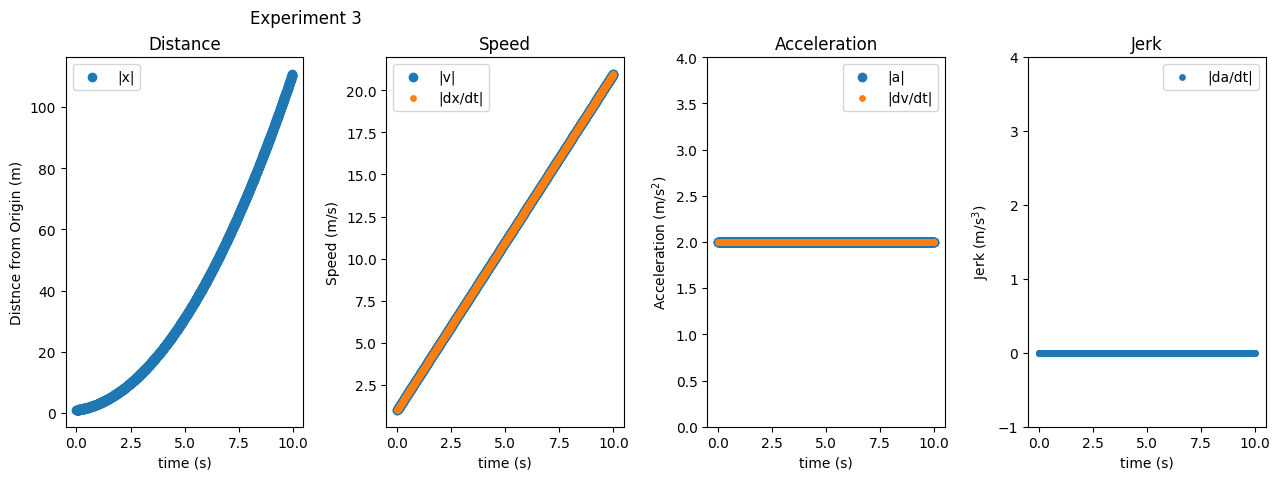

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle("Experiment 3")
fig.subplots_adjust(hspace=0.01, wspace=0.35, right=2)

ax1.scatter(timeline, norm(x_t, axis=1), label="|x|")
ax1.set_title("Distance")
ax1.legend()
ax1.set(xlabel="time (s)", ylabel="Distnce from Origin (m)")

ax2.scatter(timeline, norm(v_t   , axis=1), label="|v|")
ax2.scatter(timeline, norm(dxdt_t, axis=1), s=15, label="|dx/dt|")
ax2.set_title("Speed")
ax2.legend()
ax2.set(xlabel="time (s)", ylabel="Speed (m/s)")

ax3.scatter(timeline, norm(a_t   , axis=1), label="|a|")
ax3.scatter(timeline, norm(dvdt_t, axis=1), s=15, label="|dv/dt|")
ax3.set_ylim([0, 4])
ax3.set_title("Acceleration")
ax3.legend()
ax3.set(xlabel="time (s)", ylabel="Acceleration (m/s$^2$)")

ax4.scatter(timeline, norm(dadt_t, axis=1), s=15, label="|da/dt|")
ax4.set_ylim([-1, 4])
ax4.set_title("Jerk")
ax4.set(xlabel="time (s)", ylabel="Jerk (m/s$^3$)")
ax4.legend()
fig.show()

**Caption**

In the third experiment, we observe an object moving quadratically away from the origin over time. Our distance-versus-time graph shows a curve that steepens as the distance from the origin increases, indicating a growing velocity. By calculating the numerical derivative of the position graph, we find that the velocity increases linearly over time. The acceleration graph, which is the derivative of velocity, shows a constant positive value, indicating uniform acceleration. Further, plotting the jerk, which is the derivative of acceleration, reveals a value of zero, confirming there is no change in acceleration throughout the motion.

#   <font color='Red'> **Experiment 4** </font>

###   <font color='Red'> To begin lets start given the following initial position, velocity, and acceleration, WITH velocity and acceleration in different directions! </font>

In [ ]:
x_0 = array([10., 0., 0.]) ## m : initial position vector/array
v_0 = array([50., 0., 0.]) ## m/s : initial velocity vector/array
a_0 = array([-9.81, 0., 0.]) ## m/s/s : initial acceleration vector/array

###  <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [ ]:
x_t = zeros((len(timeline), 3)) ## initialize position-trajectory (position vectors for all times)
v_t = zeros((len(timeline), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
a_t = zeros((len(timeline), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

x_t[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
a_t[0] = a_0 ## initialize the 0th acceleration-trajectory entry to the initial-acceleration
for t in range(1,len(x_t)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt ## Velocity-Verlet Step 1 : find new position from old data
  a_t[t] = a_t[t-1] ## Velocity-Verlet Step 2 : find new acceleration from old acceleration
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

###  <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###  <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>

###  <font color='Red'> Take a time-derivative of a_t to obtain dadt_t. </font>

In [ ]:

dxdt_t = d(x_t)/dt ## take numerical-derivative of the aforementioned position-trajectory
dvdt_t = d(v_t)/dt ## take numerical-derivative of the aforementioned velocity-trajectory
dadt_t = d(a_t)/dt ## take numerical-derivative of the aforementioned acceleration-trajectory

###  <font color='Red'> Make 4 plots of with: x_t, \{v_t, dxdt_t\}, \{ a_t, dvdt_t\}, and dadt_t in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

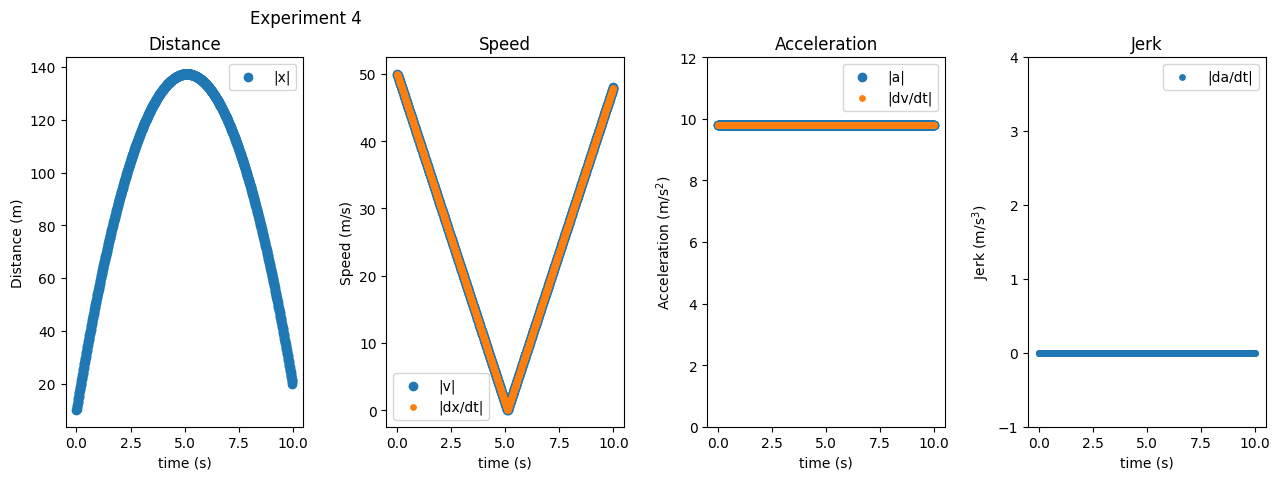

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle("Experiment 4")
fig.subplots_adjust(hspace=0.05, wspace=0.35, right=2)

ax1.scatter(timeline, norm(x_t, axis=1), label="|x|")
ax1.set_title("Distance")
ax1.legend()
ax1.set(xlabel="time (s)", ylabel="Distance (m)")

ax2.scatter(timeline, norm(v_t   , axis=1), label="|v|")
ax2.scatter(timeline, norm(dxdt_t, axis=1), s=15, label="|dx/dt|")
ax2.set_title("Speed")
ax2.legend()
ax2.set(xlabel="time (s)", ylabel="Speed (m/s)")

ax3.scatter(timeline, norm(a_t   , axis=1), label="|a|")
ax3.scatter(timeline, norm(dvdt_t, axis=1), s=15, label="|dv/dt|")
ax3.set_ylim([0, 12])
ax3.set_title("Acceleration")
ax3.legend()
ax3.set(xlabel="time (s)", ylabel="Acceleration (m/s$^2$)")

ax4.scatter(timeline, norm(dadt_t, axis=1), s=15, label="|da/dt|")
ax4.set_ylim([-1, 4])
ax4.set_title("Jerk")
ax4.legend()
ax4.set(xlabel="time (s)", ylabel="Jerk (m/s$^3$)")
ax4.legend()
fig.show()

**Caption**

In this experiment, we observe the distance of an object away from the origin that models an object thrown straight up into the air, reaching a maximum distance of 140 meters. The object would be affected by the gravitational constant of -9.81 m/s² The distance-versus-time graph shows an upward curve that peaks at 140 meters and then descends symmetrically as the object falls. Calculating the numerical derivative of the distance graph, the speed graph shows a positive value as the object rises, decreases to zero at the peak, and becomes more positive as it falls back down. This would be due to the speed graph being the absolute value of velocity. The acceleration graph remains constant at approximately 9.8 m/s² throughout, reflecting the absolute value of the constant acceleration due to gravity in this free-fall model. The jerk, as the derivative of acceleration, remains zero, indicating no change in the acceleration.

#   <font color='Red'> **Conclusion** </font>

###  <font color='Red'> Write your Conclusion here, you may type in word-processor, only to copy-n-paste it here. This .ipynb file is your lab report. </font>

###  <font color='Red'> Demostrate you understand this lab, this is the most imporant part of the lab report worth half of the total points. </font>

1.5.1 Explain the concept of Inertia

Inertia, as described by Newton's First Law of Motion, states that an object will remain at rest or in uniform motion unless acted on by an external force.  An object will not start moving, stop, or change its direction unless a force is applied. This law is foundational to physics and helps us predict the trajectory of an object.

1.5.2 Describe the Velocity-Verlet Integrator (what it does)

The Velocity-Verlet Integrator is an algorithm that integrates Newton's Laws of motion. It achieves this by updating the positions and velocities of particles, incorporating current accelerations and changes in accelerations over time.

In Experiments 3 and 4, a for loop was used to iteratively acquire velocity and position values, which depend on the acceleration at each specific point in time. Additionally, Newton's Laws of Motion served as the foundational equations for finding the velocity and position values.


1.5.3 Concluding Paragraph

In the first experiment, we observe an object's behavior at rest over time. By calculating the numerical derivative of the position graph and graphing the result, we observe that the velocity magnitude remains zero.

We would use the Velocity-Verlet Integrator more extensively for the following experiments, going from acceleration->velocity->position iteratively using a for loop and Newton's Laws of Motion.

In the Second experiment, we observe an object's behavior with constant velocity over time. We use the velocity-vector integrator algorithm to find the distance from the origin and plot that onto a graph. We will find that a constant positive velocity will have no acceleration and a positive linear function for position.

In the third experiment, we observe an object's behavior with positive acceleration. We use the velocity-vector integrator algorithm to find the speed values over time and then the distance values over time. We would plot these results. We also get the derivative of the acceleration graph to plot Jerk, which is zero. We would find an object moving at 2.0 m/s^2 would have an positive linear function for velocity and a positive quadratic function position graph.

In the fourth experiment, we observe an object's behavior with Constant Acceleration and Opposite Velocity. The experiment would simulate an object after being thrown straight upwards. The acceleration is -9.81 m/s^2 to simulate gravitational force being acted upon the object as it has an initial positive velocity moving upwards. After using the velocity-vector integrator algorithm, we plot the acceleration, speed, and distance values. The acceleration remains constant, speed has a V shaped graph as it is a negative linear function plotted as an absolute value. The Distance graph shows a graph moving away from the origin returning back to its original position.
We would also find the derivative of the acceleration graph to plot Jerk, which is zero.

In this lab, we modeled motion fundamentals with constant acceleration using Python. Acceleration, the rate of velocity change over time, remains constant throughout our experiments. On the surface of the Earth, the gravitational field exerts a continual acceleration of 9.81 m/s^2 on all objects towards the Earth's center of mass. Despite being unnoticed, gravitational force is constantly being exerted on objects on the surface of the Earth. This acceleration is unnoticed due to the support provided by the ground. However, such motion becomes evident during free fall, like an apple falling from a tree. Our objective in this laboratory is to model this phenomenon using Python, where we find position, velocity, and acceleration based on numerical methods.


